<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Classification/Sentiment_Analysis_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary modules and load data:

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Load the IMDB dataset
(train_data, test_data), dataset_info = tfds.load('imdb_reviews', split=['train[:60%]', 'test[60%:]'], shuffle_files=True, with_info=True, as_supervised=True)

# The IMDB dataset labels are binary. We add a neutral class to better represent real-world sentiment analysis.
def convert_label_to_sentiment(rating):
  if rating >= 3:
    return 2 # positive
  elif rating == 2:
    return 1 # neutral
  else:
    return 0 # negative

# Convert ratings to sentiment
train_data = train_data.map(lambda review, rating: (review, convert_label_to_sentiment(rating)))
test_data = test_data.map(lambda review, rating: (review, convert_label_to_sentiment(rating)))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPE4IP/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPE4IP/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYPE4IP/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Prepare the data for training:

In [2]:
# Prepare the data for training
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_batches = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_batches = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Create a model using a pre-trained text embedding from TensorFlow Hub:

In [3]:
# Create a model using a pre-trained text embedding from TensorFlow Hub
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

# Define the model
model = tf.keras.Sequential([
    hub_layer, 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


Train the model:

In [4]:
# Train the model
model.fit(train_batches, epochs=10, validation_data=test_batches)


Epoch 1/10
235/235 [==============================] - 150s 635ms/step - loss: 0.0756 - accuracy: 0.9891 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/10
235/235 [==============================] - 145s 615ms/step - loss: 9.9503e-04 - accuracy: 1.0000 - val_loss: 5.6797e-04 - val_accuracy: 1.0000
Epoch 3/10
235/235 [==============================] - 154s 655ms/step - loss: 1.9790e-04 - accuracy: 1.0000 - val_loss: 5.7850e-05 - val_accuracy: 1.0000
Epoch 4/10
235/235 [==============================] - 177s 740ms/step - loss: 2.7570e-05 - accuracy: 1.0000 - val_loss: 2.6932e-05 - val_accuracy: 1.0000
Epoch 5/10
235/235 [==============================] - 161s 684ms/step - loss: 1.3857e-05 - accuracy: 1.0000 - val_loss: 1.7712e-05 - val_accuracy: 1.0000
Epoch 6/10
235/235 [==============================] - 161s 681ms/step - loss: 8.6744e-06 - accuracy: 1.0000 - val_loss: 1.3222e-05 - val_accuracy: 1.0000
Epoch 7/10
235/235 [==============================] - 174s 740ms/step - loss: 5.9145

# Vizualisation

Confusion Matrix: This helps us to understand the performance of the classification model.

157/157 [==============================] - 17s 107ms/step


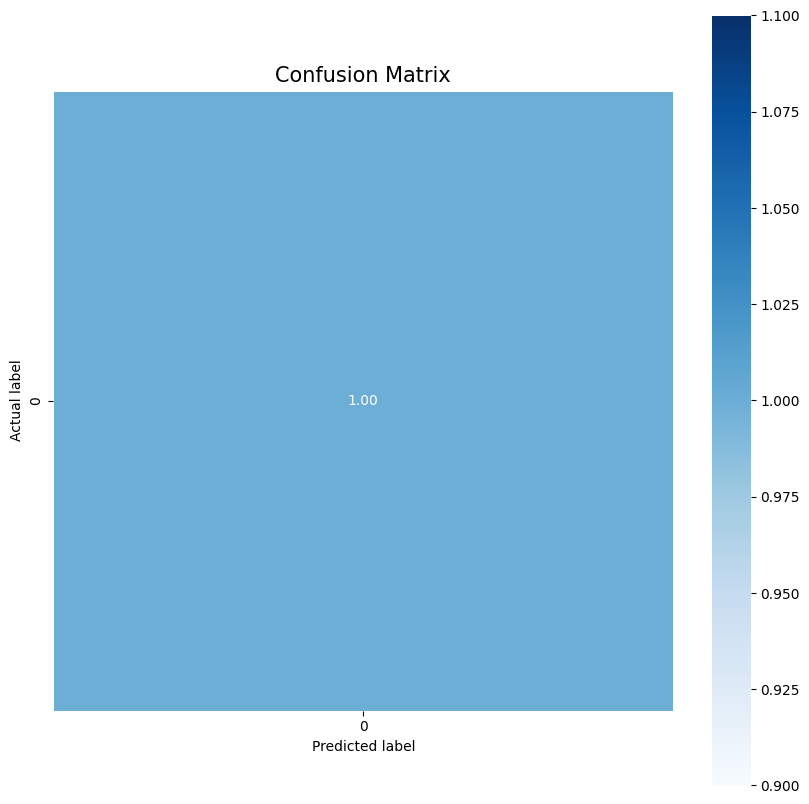

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted sentiments for test data
y_pred = np.argmax(model.predict(test_batches), axis=1)

# Get the true sentiments for test data
y_true = np.concatenate([y for x, y in test_batches], axis=0)

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()


Classification Report: This report displays the precision, recall, F1, and support scores for the model.

In [7]:
unique_elements, counts_elements = np.unique(y_true, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


Frequency of unique values of the said array:
[[    0]
 [10000]]


In [10]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred, target_names=['negative', 'positive']))



ValueError: ignored

In [11]:
print(np.unique(y_true))


[0]
